# Exercise 2 - Logistic Regression
## 2.1 Admission of Students

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

### Read the data

In [2]:
names = ["mark-1", "mark-2", "decision"]
data = pd.read_csv("ex2data1.txt", names = names)
X = data.iloc[:, :-1]
y = data.iloc[:, 2]
data.head(5)

mark-1     mark-2  decision
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1

### Visualize the data

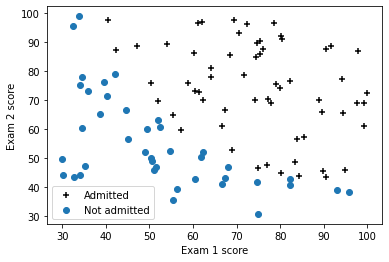

In [3]:
mask = y == 1
adm = plt.scatter(X[mask]["mark-1"].values, X[mask]["mark-2"].values, color = "black", marker = "+")
not_adm = plt.scatter(X[~mask]["mark-1"].values, X[~mask]["mark-2"].values)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))
plt.show()

In [4]:
(m, n) = X.shape
X = np.hstack((np.ones((m, 1)), X))
y = y[:, np.newaxis]
theta = np.zeros((n + 1, 1))

### Sigmoid function

In [5]:
def sigmoid(X): 
    return 1 / (1 + np.exp(-X)) 

### Cost Function

In [6]:
def costFunction(theta, X, y):
    J = (-1/m) * np.sum(np.multiply(y, np.log(sigmoid(X @ theta))) + np.multiply((1-y), np.log(1 - sigmoid(X @ theta))))
    return J

### Gradient Function

In [7]:
def gradient(theta, X, y):
    grad = (1 / m) * (X.T @ (sigmoid(X @ theta) - y))
    return grad

#### Cost and gradient at initial theta

In [8]:
J = costFunction(theta, X, y)
grad = gradient(theta, X, y)

print("Cost at initial theta (zeros): %f"% J)
print("Expected cost (approx): 0.693")
print("Gradient at initial theta (zeros):")
print(" %f\n %f\n %f" % (grad[0][0], grad[1][0], grad[2][0]))
print("Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n\n")

Cost at initial theta (zeros): 0.693147
Expected cost (approx): 0.693
Gradient at initial theta (zeros):
 -0.100000
 -12.009217
 -11.262842
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628




#### Cost and gradient at test theta

In [9]:
test_theta = [[-24], [0.2], [0.2]]
J = costFunction(theta, X, y)
grad = gradient(test_theta, X, y)

print("Cost at test theta: %f", J);
print("Expected cost (approx): 0.218");
print("Gradient at test theta: ");
print(" %f\n %f\n %f" % (grad[0][0], grad[1][0], grad[2][0]))
print("Expected gradients (approx):\n 0.043\n 2.566\n 2.647\n\n");

Cost at test theta: %f 0.6931471805599453
Expected cost (approx): 0.218
Gradient at test theta: 
 0.042903
 2.566234
 2.646797
Expected gradients (approx):
 0.043
 2.566
 2.647




### Minimize the cost

In [10]:
theta, nfeval, rc = temp = opt.fmin_tnc(func = costFunction, x0 = theta.flatten(), fprime = gradient, 
                    args = (X, y.flatten()))
J = costFunction(theta[:,np.newaxis], X, y)

print("Cost at theta found by fmin_tnc: %f" % J);
print("Expected cost (approx): 0.203");
print("theta:");
print(" %f\n %f\n %f" % (theta[0], theta[1], theta[2]))
print("Expected theta (approx):");
print(" -25.161\n 0.206\n 0.201\n\n");

Cost at theta found by fmin_tnc: 0.203498
Expected cost (approx): 0.203
theta:
 -25.161319
 0.206232
 0.201471
Expected theta (approx):
 -25.161
 0.206
 0.201




### Plot the decision boundary

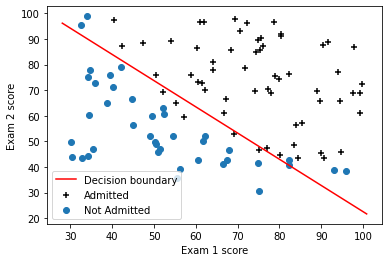

In [11]:
plot_x = [ np.min(X[:, 1] - 2), np.max(X[:, 2] + 2)]
plot_y = -1 / theta[2] * (theta[0] + np.dot(theta[1], plot_x))
mask = y.flatten() == 1
adm = plt.scatter(X[mask][:, 1], X[mask][:, 2], color = "black", marker = "+", label = "Admitted")
not_adm = plt.scatter(X[~mask][:, 1], X[~mask][:, 2], label = "Not Admitted")
decision_boun = plt.plot(plot_x, plot_y, "r", label = "Decision boundary")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc = 0)
plt.show()
print("\n\n")

### Prediction for a value

In [12]:
prob = sigmoid(np.dot([1, 45, 85], theta));
print("For a student with scores 45 and 85, we predict an admission probability of %f" % prob);
print("Expected value: 0.775 +/- 0.002\n\n");

For a student with scores 45 and 85, we predict an admission probability of 0.776291
Expected value: 0.775 +/- 0.002




### Accuracy of the model

In [13]:
def accuracy(X, y, theta, cutoff):
    pred = [sigmoid(np.dot(X, theta)) >= cutoff]
    acc = np.mean(pred == y)
    return (acc * 100)

In [14]:
print("Train Accuracy: %3.2f"% accuracy(X, y.flatten(), theta, 0.5));
print("Expected accuracy (approx): 89.0");

Train Accuracy: 89.00
Expected accuracy (approx): 89.0
